In [1]:
import logging
import logging.handlers
logging.basicConfig(
    filename  = "/workspaces/funsql/.log/funsql.log",      # Log output file
    level     = logging.DEBUG,  # Output level
    format    = '%(asctime)s\n%(levelname)s %(name)s %(threadName)s\n%(message)s\n\n\n'
)

log = logging.getLogger(__name__)
handler = logging.FileHandler('/workspaces/funsql/.log/main.log')
handler.setLevel(logging.DEBUG)
handler.setFormatter(handler.setFormatter("%(message)s\n"))
log.addHandler(handler)



In [2]:
from funsql import Hook, readTemplates
ph = Hook({
    "host"      : "psql-mock-database-cloud.postgres.database.azure.com",
    "port"      : "5432",
    "user"      : "nxhbvewxsaijdisfftwjgpuw@psql-mock-database-cloud",
    "password"  : "aexcrtmmacdnrmpsomnnsvov",
    "database"  : "booking1666875447372qmebziyvxnskbwrb"
})
query = readTemplates("./funsql/data/sql_templates.sql")

In [3]:
my_sample = query.sample10('pg_tables')
my_sample

SELECT * FROM pg_tables LIMIT 10;

In [4]:
ten_table = my_sample()
ten_table

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,company,ddvrvydmclaoowbfkhtdyyph,None,True,False,False,False
1,public,property_history,ltmtskflkgwwrgxhvwlozebc,None,True,False,False,False
2,public,config_item,ltmtskflkgwwrgxhvwlozebc,None,True,False,False,False
3,public,users,mock_database_root,None,False,False,False,False
4,public,appartments,mock_database_root,None,True,False,False,False
5,public,bookings,mock_database_root,None,False,False,False,False
6,pg_catalog,pg_statistic,azure_superuser,None,True,False,False,False
7,pg_catalog,pg_foreign_table,azure_superuser,None,True,False,False,False
8,pg_catalog,pg_authid,azure_superuser,pg_global,True,False,False,False
9,pg_catalog,pg_user_mapping,azure_superuser,None,True,False,False,False


In [8]:
for tbl in ten_table['tablename']:
    try:
        query_result = query.sample10(f"public.{tbl}")()
        nrow = query_result.shape[0]
        msg = f"Table {tbl} has {nrow if nrow<10 else 'more than 9' } rows."
        print(msg)
        log.debug(msg)
        display(query_result)
    except:
        log.warning(f"Table {tbl} is empty.")

Table property_history has 3 rows.


,id,propertykeyold,propertyvalueold,propertykeynew,propertyvaluenew,created
0,1,propertykeyOld,propertyvalueOld,propertykeyNew,propertyvalueNew,2022-09-09 08:21:09.985578
1,2,propertykeyOld,propertyvalueOld,propertykeyNew,propertyvalueNew,2022-09-09 08:22:07.345305
2,3,propertykeyOld,propertyvalueOld,propertykeyNew,propertyvalueNew,2022-09-09 08:22:07.345305


Table config_item has 2 rows.


,propertykey,propertyvalue
0,First.Config.Key,Hello This is the first Key's value.
1,Second.Config.Key,Testing Fetch All Method


Table users has more than 9 rows.


,id,first_name,last_name,full_name,job_title,job_type,phone,email,image,country,city,onboarding_completion
0,0,Kattie,Hane,Darrel Champlin,Senior Data Orchestrator,District,292.479.2831,Kirk_Torphy92@gmail.com,https://cdn.fakercloud.com/avatars/antjanus_12...,Berkshire,New Gaetano,82
1,1,Orin,Kshlerin,Robert Gerlach,Forward Assurance Designer,Future,901.373.5326 x6273,Jordon39@yahoo.com,https://cdn.fakercloud.com/avatars/txcx_128.jpg,Buckinghamshire,Felipeborough,61
2,2,Floy,Klein,Carla Huels,Human Branding Specialist,Dynamic,681.721.0550 x5379,Wilfred.Terry@yahoo.com,https://cdn.fakercloud.com/avatars/ssbb_me_128...,Bedfordshire,Padbergport,39
3,3,Breanne,Jacobi,John Hirthe,Investor Implementation Manager,Principal,1-320-695-1664 x4548,Jed.OKon@yahoo.com,https://cdn.fakercloud.com/avatars/longlivemyw...,Cambridgeshire,Kissimmee,79
4,4,Augustine,Reichert,Marco Reichel,International Group Supervisor,District,1-240-795-7808,Rodrigo_Renner@gmail.com,https://cdn.fakercloud.com/avatars/itolmach_12...,Berkshire,West Meaghan,89
5,5,Hope,Turner,Vernon Kreiger,Direct Optimization Agent,Investor,(634) 274-7122 x63780,Waylon.Wisoky@yahoo.com,https://cdn.fakercloud.com/avatars/byryan_128.jpg,Bedfordshire,Alfredchester,51
6,6,Fletcher,O'Keefe,Ms. Brandy Rice,National Factors Technician,Dynamic,635-250-9518,Rosalind_Hudson@hotmail.com,https://cdn.fakercloud.com/avatars/okandungel_...,Bedfordshire,North Cobybury,18
7,7,Eliza,Considine,Alma Lebsack,Human Solutions Architect,Central,727-456-4141,Angelita_Miller@gmail.com,https://cdn.fakercloud.com/avatars/divya_128.jpg,Borders,North Jaquelineton,11
8,8,Abel,Brakus,Dr. Luther Bartoletti,Lead Integration Executive,Global,1-215-987-8205,Edwin24@yahoo.com,https://cdn.fakercloud.com/avatars/bargaorobal...,Borders,Nigelburgh,83
9,9,Jessy,Friesen,Rhonda Kuvalis,Dynamic Group Facilitator,Corporate,823.378.9164 x178,Chanel.Kunde@yahoo.com,https://cdn.fakercloud.com/avatars/stalewine_1...,Bedfordshire,Lancaster,50


Table appartments has more than 9 rows.


,id,name,image,country,city,zip_code,address,address2,latitude,longitude,direction,booked
0,0,Wolff LLC,http://placeimg.com/640/480/city,Bedfordshire,South Macstad,80679,761 Nikita Mews,Suite 306,38.1941,58.3150,North,37
1,1,O'Keefe - Wunsch,http://placeimg.com/640/480/city,Buckinghamshire,Rosariomouth,32225-6871,016 Jules Harbor,Apt. 583,5.9271,-95.1855,Northeast,38
2,2,Waters Group,http://placeimg.com/640/480/city,Cambridgeshire,East Garett,24852-4545,690 Ullrich Ridges,Apt. 303,-10.6776,-105.1542,West,5
3,3,"McDermott\, Little and Waelchi",http://placeimg.com/640/480/city,Buckinghamshire,New Karlmouth,74416-4346,9546 Block Circle,Apt. 616,82.1055,-142.8697,East,64
4,4,Welch Group,http://placeimg.com/640/480/city,Bedfordshire,Naderborough,60182-2880,92830 Predovic Meadow,Suite 058,-32.5269,45.3129,West,22
5,5,Metz - Wunsch,http://placeimg.com/640/480/city,Bedfordshire,Pleasanton,56414,6894 Bins Wells,Suite 495,80.6713,-175.7865,West,37
6,6,Ondricka - Cartwright,http://placeimg.com/640/480/city,Bedfordshire,Bozeman,83891,71968 Pollich Pines,Suite 068,-61.4242,24.1151,Northwest,64
7,7,Cartwright and Sons,http://placeimg.com/640/480/city,Berkshire,Hilmashire,40737-9204,015 Rosalinda Parkway,Apt. 452,73.8368,94.3394,East,70
8,8,Ebert Inc,http://placeimg.com/640/480/city,Berkshire,Rancho Santa Margarita,05366-6264,08073 Hartmann Harbors,Apt. 793,-44.5338,-72.9646,Southeast,76
9,9,O'Hara - Towne,http://placeimg.com/640/480/city,Berkshire,Hegmannstad,14353-8008,0194 Shirley Estate,Apt. 318,-45.0083,-106.1228,Southwest,40


Table bookings has more than 9 rows.


,id,user_id,starts_at,booked_at,booked_for,apartment_id,confirmed
0,0,125,2021-11-19T13:22:09.767Z,2021-11-18T08:08:59.839Z,1,193,0
1,1,97,2021-11-18T22:38:13.126Z,2021-11-18T12:31:05.411Z,5,291,0
2,2,8,2021-11-18T16:08:18.545Z,2021-11-18T00:16:44.889Z,11,98,0
3,3,63,2021-11-18T22:55:58.485Z,2021-11-18T03:25:37.954Z,4,56,0
4,4,28,2021-11-19T07:09:25.341Z,2021-11-17T20:01:02.244Z,4,333,1
5,5,99,2021-11-18T18:19:47.775Z,2021-11-18T09:52:51.470Z,2,376,1
6,6,50,2021-11-19T14:20:22.366Z,2021-11-18T05:56:31.594Z,18,72,0
7,7,42,2021-11-18T18:24:52.359Z,2021-11-18T09:02:52.730Z,5,427,0
8,8,5,2021-11-18T21:04:38.236Z,2021-11-18T04:00:13.990Z,11,63,1
9,9,78,2021-11-18T16:24:30.166Z,2021-11-17T15:57:27.186Z,2,415,0


In [6]:
query.sample10('mytable') + query.columns('healthcare','transactions') + query.sample10('transactions') + query.sample10('mytable')

SELECT * FROM mytable LIMIT 10;

SELECT *
  FROM information_schema.COLUMNS
 WHERE table_schema = 'healthcare'
   AND TABLE_NAME   = 'transactions'
     ;
SELECT * FROM transactions LIMIT 10;

SELECT * FROM mytable LIMIT 10;

In [7]:
query.sample10('public.users')()

,id,first_name,last_name,full_name,job_title,job_type,phone,email,image,country,city,onboarding_completion
0,0,Kattie,Hane,Darrel Champlin,Senior Data Orchestrator,District,292.479.2831,Kirk_Torphy92@gmail.com,https://cdn.fakercloud.com/avatars/antjanus_12...,Berkshire,New Gaetano,82
1,1,Orin,Kshlerin,Robert Gerlach,Forward Assurance Designer,Future,901.373.5326 x6273,Jordon39@yahoo.com,https://cdn.fakercloud.com/avatars/txcx_128.jpg,Buckinghamshire,Felipeborough,61
2,2,Floy,Klein,Carla Huels,Human Branding Specialist,Dynamic,681.721.0550 x5379,Wilfred.Terry@yahoo.com,https://cdn.fakercloud.com/avatars/ssbb_me_128...,Bedfordshire,Padbergport,39
3,3,Breanne,Jacobi,John Hirthe,Investor Implementation Manager,Principal,1-320-695-1664 x4548,Jed.OKon@yahoo.com,https://cdn.fakercloud.com/avatars/longlivemyw...,Cambridgeshire,Kissimmee,79
4,4,Augustine,Reichert,Marco Reichel,International Group Supervisor,District,1-240-795-7808,Rodrigo_Renner@gmail.com,https://cdn.fakercloud.com/avatars/itolmach_12...,Berkshire,West Meaghan,89
5,5,Hope,Turner,Vernon Kreiger,Direct Optimization Agent,Investor,(634) 274-7122 x63780,Waylon.Wisoky@yahoo.com,https://cdn.fakercloud.com/avatars/byryan_128.jpg,Bedfordshire,Alfredchester,51
6,6,Fletcher,O'Keefe,Ms. Brandy Rice,National Factors Technician,Dynamic,635-250-9518,Rosalind_Hudson@hotmail.com,https://cdn.fakercloud.com/avatars/okandungel_...,Bedfordshire,North Cobybury,18
7,7,Eliza,Considine,Alma Lebsack,Human Solutions Architect,Central,727-456-4141,Angelita_Miller@gmail.com,https://cdn.fakercloud.com/avatars/divya_128.jpg,Borders,North Jaquelineton,11
8,8,Abel,Brakus,Dr. Luther Bartoletti,Lead Integration Executive,Global,1-215-987-8205,Edwin24@yahoo.com,https://cdn.fakercloud.com/avatars/bargaorobal...,Borders,Nigelburgh,83
9,9,Jessy,Friesen,Rhonda Kuvalis,Dynamic Group Facilitator,Corporate,823.378.9164 x178,Chanel.Kunde@yahoo.com,https://cdn.fakercloud.com/avatars/stalewine_1...,Bedfordshire,Lancaster,50


In [14]:
q2 = readTemplates("./Example queries.sql")

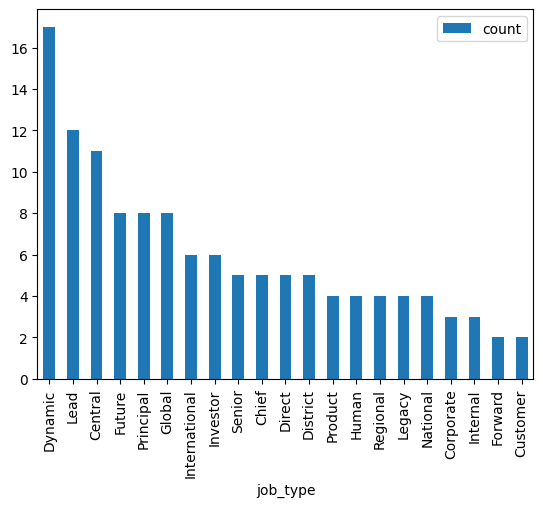

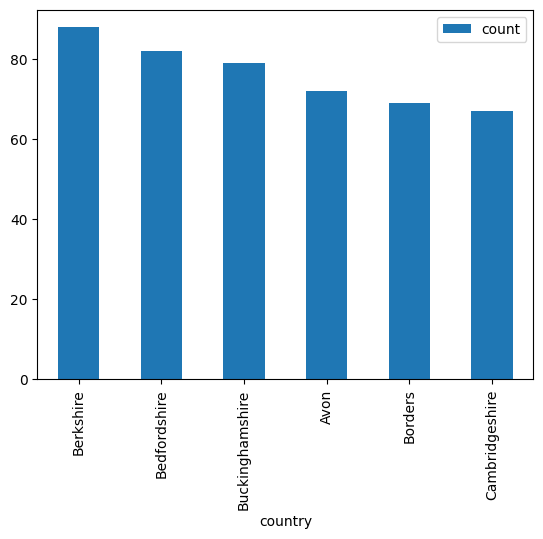

In [26]:
for col in [('job_type', 'public.users'), ('country', 'public.appartments')]:
    res = q2.validatorZ(*col)()
    res.plot(x=col[0], y='count',kind = 'bar')
    

In [28]:
job_type_vz = q2.validatorZ('job_type', 'public.users')


<AxesSubplot: xlabel='job_type'>

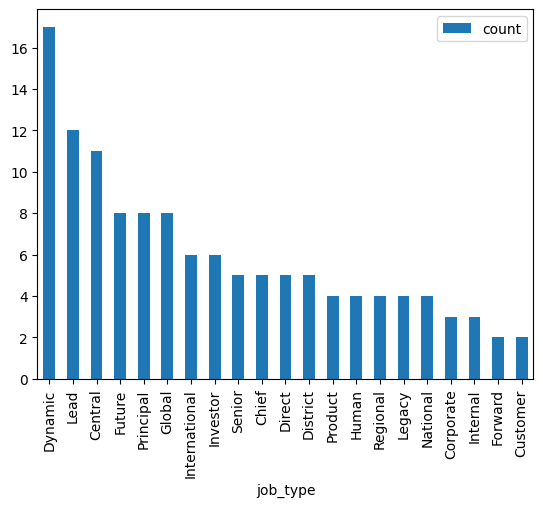

In [29]:
job_type_vz().plot(x='job_type', y='count',kind = 'bar')